In [1]:
from sklearn.datasets import load_iris
iris=load_iris().data
iris_target=load_iris().target
iris_target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [2]:
from sklearn.preprocessing import MinMaxScaler
MinMax=MinMaxScaler()
MinMax.fit(iris)
iris_transf=MinMax.transform(iris)
iris_transf

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris_transf,iris_target,random_state=14)

In [4]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [5]:
print("test_svc.score: {:.3f}".format(svc.score(X_test,y_test)))
print("test_svc.score: {:.3f}".format(svc.score(X_train,y_train)))

test_svc.score: 0.974
test_svc.score: 0.964


In [6]:
predict_labels=svc.predict([[0.13888889,0.58333333,0.15254237,0.04166667]])
print(predict_labels)

[0]


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC()
tuned_parameters=[{'kernel':['rbf'],'gamma':[1e-3,1e-4],'C':[1,10,100,1000]},{'kernel':['linear'],'C':[1,10,100,1000]}]
clf=GridSearchCV(svc,tuned_parameters)
clf.fit(X_train,y_train)

print("Best parameters: ",clf.best_params_)

Best parameters:  {'C': 1, 'kernel': 'linear'}


D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [8]:
from sklearn.svm import SVC
svc=SVC(C=1,kernel='linear')
svc.fit(X_train,y_train)
print("test_svc.score: {:.3f}".format(svc.score(X_test,y_test)))
print("test_svc.score: {:.3f}".format(svc.score(X_train,y_train)))

test_svc.score: 0.974
test_svc.score: 0.964


the accuracy of svc model with C = 10 is 0.375
the accuracy of svc model with C = 20 is 0.6696428571428571
the accuracy of svc model with C = 30 is 0.6696428571428571
the accuracy of svc model with C = 40 is 0.6964285714285714
the accuracy of svc model with C = 50 is 0.7767857142857143
the accuracy of svc model with C = 60 is 0.8482142857142857
the accuracy of svc model with C = 70 is 0.9017857142857143
the accuracy of svc model with C = 80 is 0.9107142857142857
the accuracy of svc model with C = 90 is 0.9107142857142857


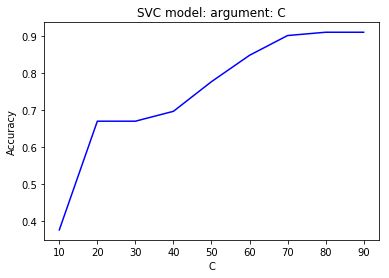

In [9]:
from sklearn.svm import SVC
Cs=[]
score=[]
for c in range(10,100,10):
    svc=SVC(C=c,gamma=0.001,kernel='rbf')
    svc.fit(X_train,y_train)
    accuracy=svc.score(X_train,y_train)
    print("the accuracy of svc model with C = {0} is {1}".format(c,accuracy))
    Cs.append(c)
    score.append(accuracy)

import matplotlib.pyplot as plt
%matplotlib inline

plt.title("SVC model: argument: C")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.plot(Cs,score,'b')

D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


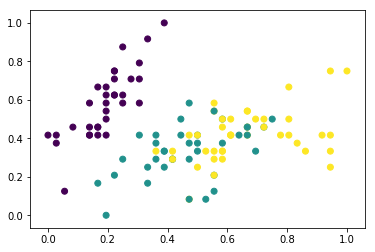

In [10]:
clf=SVC()
clf.fit(X_train,y_train)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train)



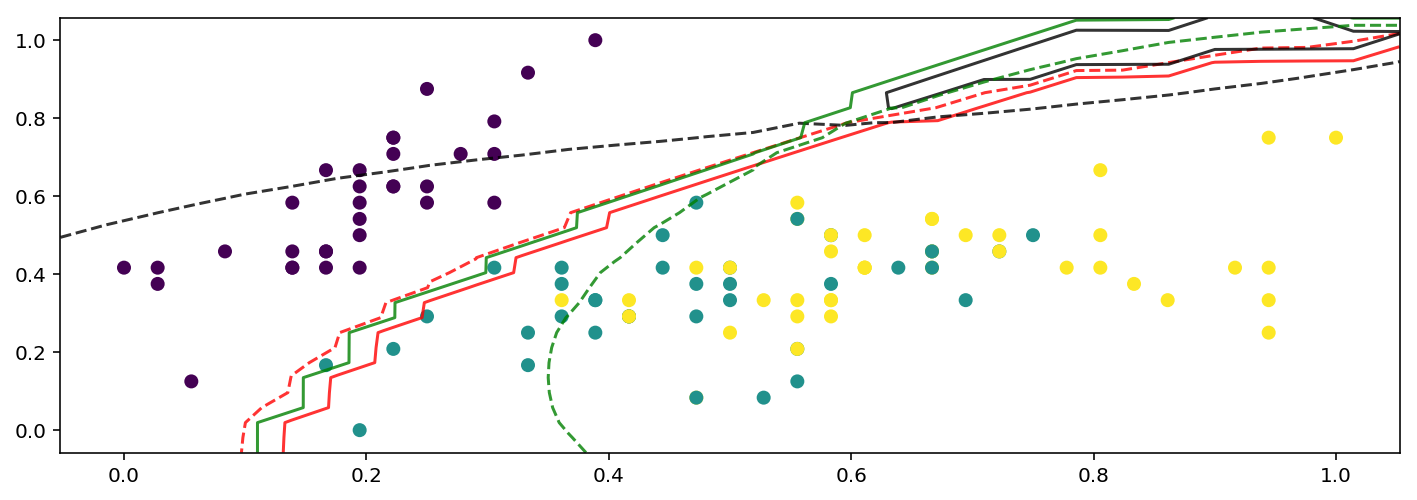

In [11]:
import numpy as np
def plot_hyperplane(clf, X, y):
    plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
    ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    xx=np.linspace(xlim[0],xlim[1],30)
    yy=np.linspace(ylim[0],ylim[1],30)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    YY,XX=np.meshgrid(yy,xx)
    #print(len(XX[0]))
    #print(len(YY[0]))
    xy=np.vstack([XX.ravel(),YY.ravel()]).T
    #print(clf.decision_function(xy))
    Z0=clf.decision_function(xy)[:,0].reshape(XX.shape)
    #print(clf.decision_function(xy))
    
    ax.contour(XX,YY,Z0,colors='r',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
    Z1=clf.decision_function(xy)[:,1].reshape(XX.shape)
    ax.contour(XX,YY,Z1,colors='k',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
    Z2=clf.decision_function(xy)[:,2].reshape(XX.shape)
    ax.contour(XX,YY,Z2,colors='g',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
    #ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=100,linewidth=1,c='g')
    plt.show()

from sklearn import svm

plt.figure(figsize=(12, 4), dpi=144)
#print(type(X_train[1]))
x2train=X_train.T[range(0,2)].T
#print(x2train)

clf = svm.SVC(C=50.0, kernel='rbf',gamma=1)
clf.fit(x2train, y_train)

plot_hyperplane(clf, x2train, y_train)

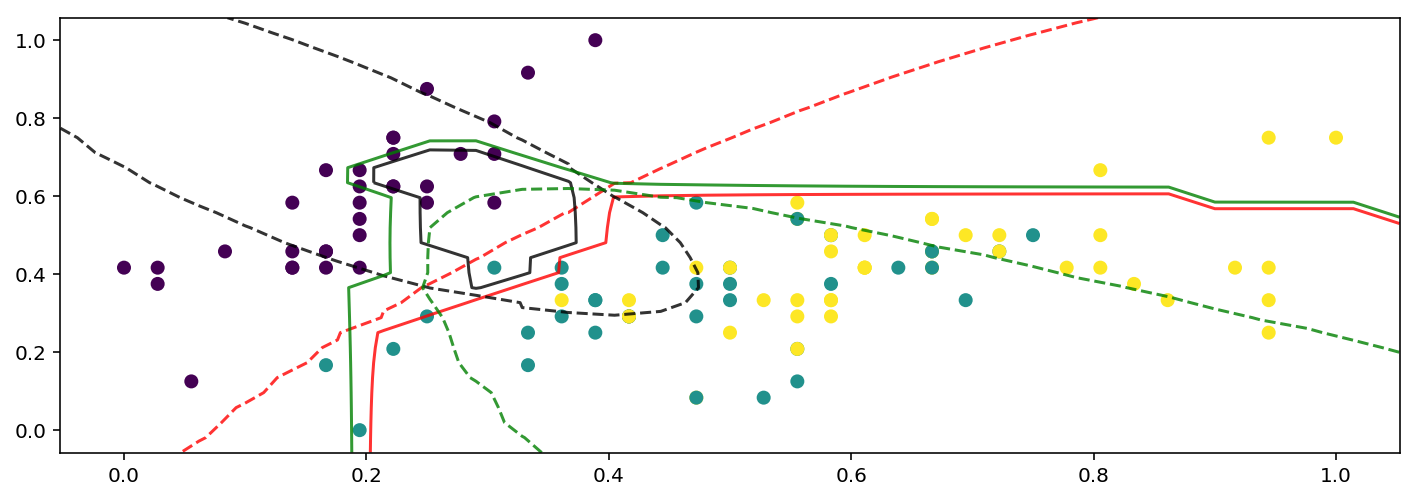

In [12]:
plt.figure(figsize=(12, 4), dpi=144)
clf = svm.SVC(C=5.0, kernel='sigmoid',gamma=2)
clf.fit(x2train, y_train)

plot_hyperplane(clf, x2train, y_train)

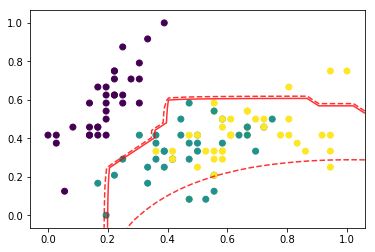

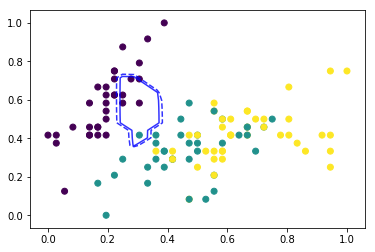

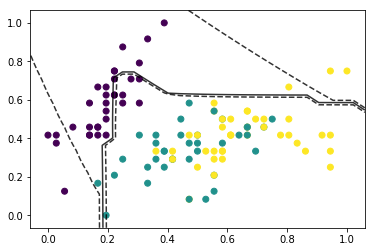

In [13]:
def plot_ahyperplane(clf, X, y,na,c):
    plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
    ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    xx=np.linspace(xlim[0],xlim[1],30)
    yy=np.linspace(ylim[0],ylim[1],30)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    YY,XX=np.meshgrid(yy,xx)
    #print(len(XX[0]))
    #print(len(YY[0]))
    xy=np.vstack([XX.ravel(),YY.ravel()]).T
    #print(clf.decision_function(xy))
    Z=clf.decision_function(xy)[:,na].reshape(XX.shape)
    #print(clf.decision_function(xy))
    
    ax.contour(XX,YY,Z,colors=c,levels=[-0.3,0,0.3],alpha=0.8,linestyles=['--','-','--'])
    Z1=clf.decision_function(xy)[:,1].reshape(XX.shape)
    #ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=100,linewidth=1,c='g')
    plt.show()
plot_ahyperplane(clf, x2train, y_train,0,'r')
plot_ahyperplane(clf, x2train, y_train,1,'b')
plot_ahyperplane(clf, x2train, y_train,2,'k')

In [14]:
from sklearn.datasets import load_digits
digits=load_digits().data
digits_target=load_digits().target
digits_images=load_digits().images
print(digits)
print(digits_target)


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [15]:
from sklearn.preprocessing import MinMaxScaler
MinMax=MinMaxScaler()
MinMax.fit(digits)
digits_transf=MinMax.transform(digits)
digits_transf

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(digits_transf,digits_target,random_state=18)


In [17]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
print("test_svc.score: {:.3f}".format(svc.score(X_test,y_test)))
print("test_svc.score: {:.3f}".format(svc.score(X_train,y_train)))

D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


test_svc.score: 0.969
test_svc.score: 0.969


In [18]:
#手写数字搜寻最佳参数
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC()
tuned_parameters=[{'kernel':['rbf'],'gamma':[1e-3,1e-4],'C':[1,10,100,1000]},{'kernel':['linear'],'C':[1,10,100,1000]}]
clf=GridSearchCV(svc,tuned_parameters)
clf.fit(X_train,y_train)

print("Best parameters: ",clf.best_params_)

D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters:  {'C': 1, 'kernel': 'linear'}


D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


the accuracy of svc model with C = 10 is 0.9547141796585004
the accuracy of svc model with C = 20 is 0.9710467706013363
the accuracy of svc model with C = 30 is 0.9762435040831478
the accuracy of svc model with C = 40 is 0.9806978470675576
the accuracy of svc model with C = 50 is 0.9829250185597624
the accuracy of svc model with C = 60 is 0.9873793615441723
the accuracy of svc model with C = 70 is 0.9881217520415738
the accuracy of svc model with C = 80 is 0.9888641425389755
the accuracy of svc model with C = 90 is 0.9896065330363771
the accuracy of svc model with C = 100 is 0.9903489235337788
the accuracy of svc model with C = 110 is 0.9910913140311804
the accuracy of svc model with C = 120 is 0.991833704528582
the accuracy of svc model with C = 130 is 0.991833704528582
the accuracy of svc model with C = 140 is 0.991833704528582
the accuracy of svc model with C = 150 is 0.991833704528582
the accuracy of svc model with C = 160 is 0.9925760950259837
the accuracy of svc model with C = 17

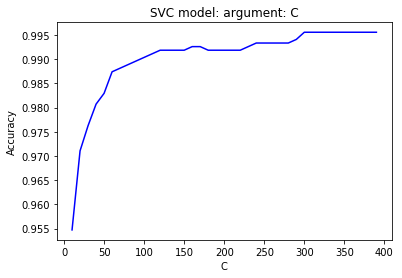

In [19]:
from sklearn.svm import SVC
Cs=[]
score=[]
for c in range(10,400,10):
    svc=SVC(C=c,gamma=0.001,kernel='rbf')
    svc.fit(X_train,y_train)
    accuracy=svc.score(X_train,y_train)
    print("the accuracy of svc model with C = {0} is {1}".format(c,accuracy))
    Cs.append(c)
    score.append(accuracy)

import matplotlib.pyplot as plt
%matplotlib inline

plt.title("SVC model: argument: C")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.plot(Cs,score,'b')

In [20]:
print(digits_images.shape)
print(digits_images)
print(digits_images[0,0,3])

(1797, 8, 8)
[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. 

In [21]:
print(digits_images.max())
print(digits_images.min())

16.0
0.0


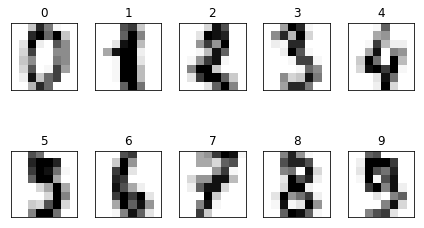

In [22]:
din=digits_images

fig, ax = plt.subplots(nrows=2, ncols=5, sharex='all', sharey='all')#2行5列排布图片 不显示坐标轴
ax = ax.flatten()#将对应下标转换成一维，第i个子图即可用ax[i]访问
for i in range(10):
    ax[i].imshow(din[i], cmap='Greys', interpolation='nearest')#画出灰度图像
    ax[i].set_title(digits_target[i])#真实标签
ax[0].set_xticks([])#不显示坐标轴
ax[0].set_yticks([])#
plt.tight_layout()
plt.show()


In [23]:
def sigmoid(inX):
    '''
    输入：sigmoid函数的输入值
    输出：sigmoid函数输出结果
    描述：sigmoid函数实现
    '''
    return 1.0/(1.0+np.exp(-inX))
def classifyVector(inX, weights):
    '''
    输入：样本数据，回归系数
    输出：分类结果（0 或 1）
    描述：使用优化后的回归系数对数据进行分类
    '''
    prob = sigmoid(sum(inX*weights)) #计算sigmoid函数输出结果
    if prob > 0.5: return 1.0
    else: return 0.0
def stocGradAscent1(dataMatrix, classLabels, maxIter=150):
    '''
    输入：数据集，对应数据的类标签
    输出：回归系数
    描述：stocGradAscent0函数的改进版本，降低了结果的
    周期性波动，提高了结果的收敛速度
    注：相对stocGradAscent0改进的部分用
    '''
    m,n = np.shape(dataMatrix)  #得到数据集 行数（样本数）和 列数（特征数)
    weights = np.ones(n)        #将回归系数各分量初始化为1
    for j in range(maxIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001 #【改进1】：alpha在每次迭代都会调整，会一定程度上缓解
                                       #结果的周期性波动。同时，由于常数项的存在，虽然alpha会
                                       #随着迭代次数不断减少，但永远都不会减少到 0。这保证了多
                                       #次迭代后新数据仍然会有影响
            randIndex = int(np.random.uniform(0,len(dataIndex)))#【改进2】：随机选取样本更新回归系数
                                                             #也可缓解结果的周期性波动
            h = sigmoid(sum(dataMatrix[randIndex]*weights))            #得到sigmoid的输出值
            error = classLabels[randIndex] - h                         #使用向量减法计算误差
            weights = weights + alpha * error * dataMatrix[randIndex]  #梯度上升法迭代式实现
            del(dataIndex[randIndex])  #将随机选择的样本从数据集中删除，避免影响下一次迭代
    return weights
def colicTest():
    frTrain = open('D://PUB128//horseColic//horseColicTraining.txt')#打开训练集文件
    frTest = open('D://PUB128//horseColic//horseColicTest.txt')     #打开测试集文件
    #将训练集数据和对应标签存放到trainingSet和trainingLabels中
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    #训练算法，得到回归系数trainWeights
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 1000)
    #每行读取测试集数据，使用回归系数得到分类结果
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        #若分类结果不一致，则errorCount加一
        if int(classifyVector(np.array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    #打印此次测试的错误率
    print ("the error rate of this test is: %f" % errorRate)
    return errorRate

In [24]:
colicTest()

D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


the error rate of this test is: 0.358209


0.3582089552238806

In [1]:
frTrain = open('D://PUB128//horseColic//horseColicTraining.txt')#打开训练集文件
frTest = open('D://PUB128//horseColic//horseColicTest.txt')     #打开测试集文件
#将训练集数据和对应标签存放到trainingSet和trainingLabels中
trainingSet = []; trainingLabels = []
for line in frTrain.readlines():
    currLine = line.strip().split('\t')#用tab符号分割
    lineArr =[]
    for i in range(21):
        lineArr.append(float(currLine[i]))
    trainingSet.append(lineArr)
    trainingLabels.append(float(currLine[21]))

In [4]:
print(trainingSet)
print(trainingLabels)

[[2.0, 1.0, 38.5, 66.0, 28.0, 3.0, 3.0, 0.0, 2.0, 5.0, 4.0, 4.0, 0.0, 0.0, 0.0, 3.0, 5.0, 45.0, 8.4, 0.0, 0.0], [1.0, 1.0, 39.2, 88.0, 20.0, 0.0, 0.0, 4.0, 1.0, 3.0, 4.0, 2.0, 0.0, 0.0, 0.0, 4.0, 2.0, 50.0, 85.0, 2.0, 2.0], [2.0, 1.0, 38.3, 40.0, 24.0, 1.0, 1.0, 3.0, 1.0, 3.0, 3.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 33.0, 6.7, 0.0, 0.0], [1.0, 9.0, 39.1, 164.0, 84.0, 4.0, 1.0, 6.0, 2.0, 2.0, 4.0, 4.0, 1.0, 2.0, 5.0, 3.0, 0.0, 48.0, 7.2, 3.0, 5.3], [2.0, 1.0, 37.3, 104.0, 35.0, 0.0, 0.0, 6.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 74.0, 7.4, 0.0, 0.0], [2.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 3.0, 1.0, 2.0, 3.0, 2.0, 2.0, 1.0, 0.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 37.9, 48.0, 16.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 1.0, 1.0, 0.0, 3.0, 5.0, 37.0, 7.0, 0.0, 0.0], [1.0, 1.0, 0.0, 60.0, 0.0, 3.0, 0.0, 0.0, 1.0, 0.0, 4.0, 2.0, 2.0, 1.0, 0.0, 3.0, 4.0, 44.0, 8.3, 0.0, 0.0], [2.0, 1.0, 0.0, 80.0, 36.0, 3.0, 4.0, 3.0, 1.0, 4.0, 4.0, 4.0, 2.0, 1.0, 0.0, 3.0, 5.0, 38.0, 6.2, 0.0, 0.0], [2.0

In [3]:
from sklearn import svm
reg=svm.SVR(kernel='rbf', gamma=0.1)
reg.fit(trainingSet,trainingLabels)
reg.score(trainingSet,trainingLabels)

0.9473803104261502

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
gammalist=[i*1e-2 for i in range(25,100,25)]
tuned_parameters=[{'kernel':['rbf'],'gamma':gammalist,'C':[i for i in range(10,100,10)]},{'kernel':['linear'],'C':[i for i in range(10,100,10)]}]
svr=svm.SVR()
reg=GridSearchCV(svr,tuned_parameters)
reg.fit(trainingSet,trainingLabels)

print("Best parameters: ",reg.best_params_)

D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters:  {'kernel': 'rbf', 'C': 90, 'gamma': 0.25}


D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [1]:
[i*1e-2 for i in range(25,100,25)]

[0.25, 0.5, 0.75]

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
gammalist=[5]
tuned_parameters=[{'kernel':['rbf'],'gamma':gammalist,'C':[10,20]},{'kernel':['linear'],'C':[10,20]}]
svr=svm.SVR()
reg=GridSearchCV(svr,tuned_parameters)
reg.fit(trainingSet,trainingLabels)

print("Best parameters: ",reg.best_params_)

D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters:  {'kernel': 'linear', 'C': 10}


In [7]:
from sklearn import svm
reg=svm.SVR(kernel='rbf',gamma=0.25,C=90)
reg.fit(trainingSet,trainingLabels)
print(reg.score(trainingSet,trainingLabels))

0.947396204652099


In [29]:
import scipy
from sklearn.model_selection import RandomizedSearchCV
parameters={'C':scipy.stats.expon(scale=100),'gamma':scipy.stats.expon(scale=0.1),'kernel':['rbf','linear']}

svr=svm.SVR()
reg=RandomizedSearchCV(svr,parameters,n_iter=5,n_jobs=-1)
reg.fit(trainingSet,trainingLabels)

print("Best parameters: ",reg.best_params_)

D:\Users\DELL\Anaconda3\envs\tf1\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters:  {'kernel': 'linear', 'C': 67.78036290897897, 'gamma': 0.1520009056664342}


In [21]:
import scipy
from sklearn.model_selection import RandomizedSearchCV

svr=svm.SVR()
reg=RandomizedSearchCV(svr,tuned_parameters,n_iter=5,n_jobs=-1,cv=10,scoring='accuracy')
reg.fit(trainingSet,trainingLabels)

print("Best parameters: ",reg.best_params_)

AttributeError: 'list' object has no attribute 'values'

In [30]:
from sklearn import svm
reg=svm.SVR(kernel='linear', C=67.78036290897897)
reg.fit(trainingSet,trainingLabels)
reg.score(trainingSet,trainingLabels)

0.1887422807136988